## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

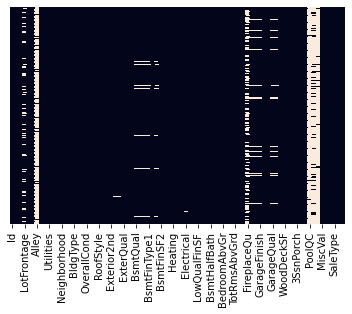

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [10]:
## droping the column which has more missing value

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
df.shape

(1460, 77)

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.drop(['Alley'],axis=1,inplace=True)
df.shape

(1460, 75)

In [19]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [20]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

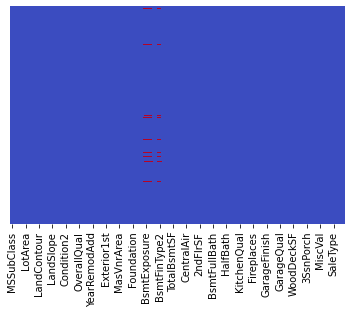

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [22]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

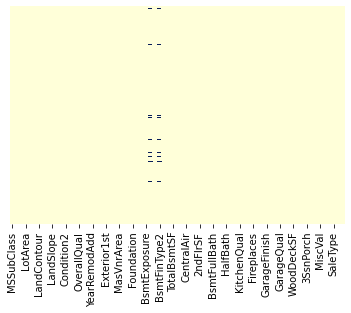

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [24]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(1422, 75)

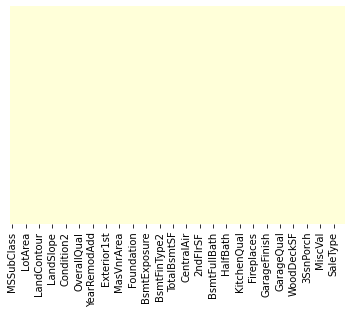

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [28]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
##HAndle Categorical Features

In [30]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [31]:
len(columns)

39

In [32]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [33]:
main_df=df.copy()

In [34]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [35]:
test_df.shape

(1459, 74)

In [36]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [37]:
final_df=pd.concat([df,test_df],axis=0)

In [38]:
final_df.to_csv('final.csv',index=False)

In [39]:
final_df.shape

(2881, 75)

In [40]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [41]:
final_df.shape

(2881, 235)

In [42]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [43]:
final_df.shape

(2881, 175)

In [44]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [45]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [46]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [47]:
df_Test.shape

(1459, 175)

In [48]:
df_Train.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1422, dtype: float64

In [49]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [451]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [452]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Prediciton and selecting the Algorithm

In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [453]:
import xgboost
classifier=xgboost.XGBRegressor()

In [454]:
import xgboost
regressor=xgboost.XGBRegressor()

In [455]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [456]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [457]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [486]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,0,0,0,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
print(X_train)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [460]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter

In [461]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [462]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [511]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [512]:
regressor.fit(X_train,y_train)

[19:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=1, monotone_constraints='()', n_estimators=900, n_jobs=1,
             nthread=1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [491]:
df_Test.shape

(1459, 166)

In [514]:
df_Test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [513]:
df_Test.shape

(5, 165)

In [494]:
df_Test.SalePrice

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [515]:
df_Test = df_Test.drop(['SalePrice'],axis=1).head()

KeyError: "['SalePrice'] not found in axis"

In [516]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [509]:
df_Test.to_csv('df_test.csv',index=False)

In [517]:
y_pred=regressor.predict(df_Test)

In [518]:
y_pred

array([125856.164, 165362.28 , 187989.52 , 194994.03 , 175860.81 ],
      dtype=float32)

## Step2

In [335]:
pred.columns=['SalePrice']

In [336]:
temp_df=df_Train['SalePrice'].copy()

In [337]:
temp_df.column=['SalePrice']

In [338]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [339]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [253]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [340]:
df_Test=pd.concat([df_Test,pred],axis=1)

(5, 175)

In [341]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [343]:
df_Train.shape

(2881, 175)

In [345]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [58]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 3s 16ms/step - loss: 182758.1250 - val_loss: 159368.7656
Epoch 2/1000
114/114 [==============================] - 1s 13ms/step - loss: 110235.4453 - val_loss: 68896.2500
Epoch 3/1000
114/114 [==============================] - 1s 5ms/step - loss: 69028.9219 - val_loss: 65974.4375
Epoch 4/1000
114/114 [==============================] - 0s 4ms/step - loss: 66147.2734 - val_loss: 64156.8984
Epoch 5/1000
114/114 [==============================] - 0s 3ms/step - loss: 63918.6992 - val_loss: 62578.9258
Epoch 6/1000
114/114 [==============================] - 0s 3ms/step - loss: 61545.9766 - val_loss: 61041.3555
Epoch 7/1000
114/114 [==============================] - 0s 2ms/step - loss: 60343.2695 - val_loss: 59658.7305
Epoch 8/1000
114/114 [==============================] - 0s 3ms/step - loss: 57594.0938 - val_loss: 58665.6328
Epoch 9/1000
114/114 [==============================] - 0s 2ms/step - loss: 55951.0234 - val_loss: 57526.5664
Epoch

Epoch 75/1000
114/114 [==============================] - 0s 3ms/step - loss: 35081.8945 - val_loss: 44341.1758
Epoch 76/1000
114/114 [==============================] - 1s 5ms/step - loss: 34593.1836 - val_loss: 44286.3633
Epoch 77/1000
114/114 [==============================] - 0s 3ms/step - loss: 34696.4180 - val_loss: 44402.4570
Epoch 78/1000
114/114 [==============================] - 0s 3ms/step - loss: 34525.5547 - val_loss: 44263.3516
Epoch 79/1000
114/114 [==============================] - 0s 3ms/step - loss: 34934.2227 - val_loss: 44212.4219
Epoch 80/1000
114/114 [==============================] - 1s 5ms/step - loss: 34846.8164 - val_loss: 44535.9844
Epoch 81/1000
114/114 [==============================] - 0s 3ms/step - loss: 34411.2422 - val_loss: 44453.1211
Epoch 82/1000
114/114 [==============================] - 0s 3ms/step - loss: 34811.7500 - val_loss: 44304.8633
Epoch 83/1000
114/114 [==============================] - 0s 3ms/step - loss: 34415.2109 - val_loss: 44939.1914
E

114/114 [==============================] - 0s 4ms/step - loss: 32947.5312 - val_loss: 43709.9102
Epoch 149/1000
114/114 [==============================] - 0s 4ms/step - loss: 32645.3438 - val_loss: 43626.0664
Epoch 150/1000
114/114 [==============================] - 0s 4ms/step - loss: 32517.5664 - val_loss: 43832.8906
Epoch 151/1000
114/114 [==============================] - 1s 4ms/step - loss: 32623.6445 - val_loss: 44291.4961
Epoch 152/1000
114/114 [==============================] - 1s 4ms/step - loss: 32337.2422 - val_loss: 44810.3594
Epoch 153/1000
114/114 [==============================] - 0s 4ms/step - loss: 32334.1777 - val_loss: 43661.3945
Epoch 154/1000
114/114 [==============================] - 0s 4ms/step - loss: 32511.6133 - val_loss: 43922.0586
Epoch 155/1000
114/114 [==============================] - 0s 3ms/step - loss: 32530.6602 - val_loss: 45162.6406
Epoch 156/1000
114/114 [==============================] - 0s 3ms/step - loss: 32255.0430 - val_loss: 43693.4023
Epoch 1

114/114 [==============================] - 0s 3ms/step - loss: 31045.9414 - val_loss: 43657.7188
Epoch 222/1000
114/114 [==============================] - 0s 3ms/step - loss: 30754.1387 - val_loss: 43271.8906
Epoch 223/1000
114/114 [==============================] - 0s 3ms/step - loss: 31321.8398 - val_loss: 43429.3555
Epoch 224/1000
114/114 [==============================] - 0s 3ms/step - loss: 31015.7793 - val_loss: 43618.0859
Epoch 225/1000
114/114 [==============================] - 0s 3ms/step - loss: 30725.2285 - val_loss: 44138.3711
Epoch 226/1000
114/114 [==============================] - 0s 3ms/step - loss: 31085.9023 - val_loss: 43942.7422
Epoch 227/1000
114/114 [==============================] - 0s 3ms/step - loss: 31022.8672 - val_loss: 43193.3867
Epoch 228/1000
114/114 [==============================] - 0s 3ms/step - loss: 30355.1055 - val_loss: 43247.3359
Epoch 229/1000
114/114 [==============================] - 0s 3ms/step - loss: 30723.5820 - val_loss: 44398.1328
Epoch 2

114/114 [==============================] - 0s 3ms/step - loss: 29454.4805 - val_loss: 42577.2266
Epoch 295/1000
114/114 [==============================] - 0s 3ms/step - loss: 29303.3887 - val_loss: 42355.7930
Epoch 296/1000
114/114 [==============================] - 0s 3ms/step - loss: 29219.3789 - val_loss: 42347.9414
Epoch 297/1000
114/114 [==============================] - 1s 5ms/step - loss: 29064.9375 - val_loss: 42313.1758
Epoch 298/1000
114/114 [==============================] - 1s 5ms/step - loss: 29368.5469 - val_loss: 42493.9141
Epoch 299/1000
114/114 [==============================] - 0s 3ms/step - loss: 28941.2891 - val_loss: 42522.7109
Epoch 300/1000
114/114 [==============================] - 0s 3ms/step - loss: 28866.8984 - val_loss: 42520.2773
Epoch 301/1000
114/114 [==============================] - 0s 3ms/step - loss: 29021.0977 - val_loss: 44615.6406
Epoch 302/1000
114/114 [==============================] - 0s 3ms/step - loss: 30028.8203 - val_loss: 42152.7070
Epoch 3

114/114 [==============================] - 0s 4ms/step - loss: 27602.9336 - val_loss: 41217.3516
Epoch 368/1000
114/114 [==============================] - 0s 3ms/step - loss: 27759.4531 - val_loss: 40827.8789
Epoch 369/1000
114/114 [==============================] - 0s 3ms/step - loss: 27581.9609 - val_loss: 41029.9531
Epoch 370/1000
114/114 [==============================] - 0s 3ms/step - loss: 27624.3320 - val_loss: 41236.6133
Epoch 371/1000
114/114 [==============================] - 0s 3ms/step - loss: 27576.1152 - val_loss: 41421.2305
Epoch 372/1000
114/114 [==============================] - 0s 3ms/step - loss: 27163.3262 - val_loss: 42292.5391
Epoch 373/1000
114/114 [==============================] - 0s 3ms/step - loss: 27210.4043 - val_loss: 40750.2578
Epoch 374/1000
114/114 [==============================] - 0s 4ms/step - loss: 27214.7539 - val_loss: 40762.6914
Epoch 375/1000
114/114 [==============================] - 0s 3ms/step - loss: 27245.2832 - val_loss: 41657.3867
Epoch 3

114/114 [==============================] - 0s 2ms/step - loss: 25373.4512 - val_loss: 39008.2227
Epoch 441/1000
114/114 [==============================] - 0s 2ms/step - loss: 26261.6406 - val_loss: 38952.5859
Epoch 442/1000
114/114 [==============================] - 0s 4ms/step - loss: 25662.6699 - val_loss: 38961.4844
Epoch 443/1000
114/114 [==============================] - 0s 4ms/step - loss: 25792.3398 - val_loss: 39675.4609
Epoch 444/1000
114/114 [==============================] - 0s 2ms/step - loss: 25466.6445 - val_loss: 38863.4570
Epoch 445/1000
114/114 [==============================] - 0s 2ms/step - loss: 25744.9531 - val_loss: 38952.0312
Epoch 446/1000
114/114 [==============================] - 0s 2ms/step - loss: 25855.2969 - val_loss: 39498.5039
Epoch 447/1000
114/114 [==============================] - 0s 2ms/step - loss: 25742.1875 - val_loss: 39222.4688
Epoch 448/1000
114/114 [==============================] - 0s 3ms/step - loss: 25712.0410 - val_loss: 38696.9180
Epoch 4

114/114 [==============================] - 0s 3ms/step - loss: 24598.7598 - val_loss: 37271.0938
Epoch 514/1000
114/114 [==============================] - 0s 4ms/step - loss: 24076.1172 - val_loss: 37499.1992
Epoch 515/1000
114/114 [==============================] - 0s 3ms/step - loss: 24397.5938 - val_loss: 37333.1914
Epoch 516/1000
114/114 [==============================] - 0s 3ms/step - loss: 24304.5723 - val_loss: 37565.2383
Epoch 517/1000
114/114 [==============================] - 0s 3ms/step - loss: 24189.8301 - val_loss: 37857.0664
Epoch 518/1000
114/114 [==============================] - 0s 2ms/step - loss: 24744.3555 - val_loss: 37318.6719
Epoch 519/1000
114/114 [==============================] - 0s 4ms/step - loss: 24841.0293 - val_loss: 37334.3633
Epoch 520/1000
114/114 [==============================] - 1s 5ms/step - loss: 24667.6562 - val_loss: 37530.1445
Epoch 521/1000
114/114 [==============================] - 0s 2ms/step - loss: 24423.3535 - val_loss: 37581.1055
Epoch 5

114/114 [==============================] - 0s 2ms/step - loss: 23589.2520 - val_loss: 36677.1680
Epoch 587/1000
114/114 [==============================] - 0s 2ms/step - loss: 23713.0176 - val_loss: 36958.8438
Epoch 588/1000
114/114 [==============================] - 1s 5ms/step - loss: 23743.0195 - val_loss: 36671.9492
Epoch 589/1000
114/114 [==============================] - 0s 3ms/step - loss: 23659.4570 - val_loss: 36604.5469
Epoch 590/1000
114/114 [==============================] - 0s 3ms/step - loss: 23885.6484 - val_loss: 36582.2891
Epoch 591/1000
114/114 [==============================] - 0s 3ms/step - loss: 23877.0801 - val_loss: 36376.4297
Epoch 592/1000
114/114 [==============================] - 1s 5ms/step - loss: 23768.0371 - val_loss: 36459.7461
Epoch 593/1000
114/114 [==============================] - 1s 5ms/step - loss: 23729.9609 - val_loss: 36763.5078
Epoch 594/1000
114/114 [==============================] - 0s 3ms/step - loss: 23495.0078 - val_loss: 37308.9336
Epoch 5

114/114 [==============================] - 0s 3ms/step - loss: 23049.4473 - val_loss: 36011.7812
Epoch 660/1000
114/114 [==============================] - 0s 4ms/step - loss: 22948.6641 - val_loss: 36798.1562
Epoch 661/1000
114/114 [==============================] - 0s 3ms/step - loss: 22932.3535 - val_loss: 38446.1094
Epoch 662/1000
114/114 [==============================] - 0s 3ms/step - loss: 23727.3887 - val_loss: 38322.2227
Epoch 663/1000
114/114 [==============================] - 0s 4ms/step - loss: 22731.7500 - val_loss: 37492.5000
Epoch 664/1000
114/114 [==============================] - 0s 3ms/step - loss: 23161.8652 - val_loss: 36114.8789
Epoch 665/1000
114/114 [==============================] - 0s 3ms/step - loss: 22711.3711 - val_loss: 36036.1094
Epoch 666/1000
114/114 [==============================] - 0s 2ms/step - loss: 22934.2500 - val_loss: 36862.3281
Epoch 667/1000
114/114 [==============================] - 0s 2ms/step - loss: 22710.9375 - val_loss: 38308.1172
Epoch 6

114/114 [==============================] - 1s 5ms/step - loss: 21901.7891 - val_loss: 37044.5820
Epoch 733/1000
114/114 [==============================] - 0s 3ms/step - loss: 22410.7441 - val_loss: 35933.5859
Epoch 734/1000
114/114 [==============================] - 0s 3ms/step - loss: 22235.9199 - val_loss: 36888.6562
Epoch 735/1000
114/114 [==============================] - 1s 5ms/step - loss: 22397.1211 - val_loss: 35777.7695
Epoch 736/1000
114/114 [==============================] - 1s 4ms/step - loss: 22144.8242 - val_loss: 36197.5898
Epoch 737/1000
114/114 [==============================] - 0s 3ms/step - loss: 22161.8223 - val_loss: 36404.3398
Epoch 738/1000
114/114 [==============================] - 0s 3ms/step - loss: 22108.9648 - val_loss: 36463.7812
Epoch 739/1000
114/114 [==============================] - 1s 5ms/step - loss: 22402.8242 - val_loss: 35964.3984
Epoch 740/1000
114/114 [==============================] - 0s 3ms/step - loss: 21958.3086 - val_loss: 36044.9102
Epoch 7

114/114 [==============================] - 0s 3ms/step - loss: 21740.9121 - val_loss: 35901.0508
Epoch 806/1000
114/114 [==============================] - 0s 3ms/step - loss: 21904.3320 - val_loss: 35974.0977
Epoch 807/1000
114/114 [==============================] - 0s 3ms/step - loss: 21814.8320 - val_loss: 36262.6680
Epoch 808/1000
114/114 [==============================] - 1s 4ms/step - loss: 21942.8555 - val_loss: 36653.2656
Epoch 809/1000
114/114 [==============================] - 0s 3ms/step - loss: 21818.8047 - val_loss: 35669.7266
Epoch 810/1000
114/114 [==============================] - 0s 3ms/step - loss: 21322.4160 - val_loss: 35969.2266
Epoch 811/1000
114/114 [==============================] - 0s 2ms/step - loss: 21650.1797 - val_loss: 36104.4297
Epoch 812/1000
114/114 [==============================] - 0s 2ms/step - loss: 22053.6816 - val_loss: 35839.2148
Epoch 813/1000
114/114 [==============================] - 0s 3ms/step - loss: 22028.6113 - val_loss: 35688.4453
Epoch 8

114/114 [==============================] - 0s 3ms/step - loss: 21300.6406 - val_loss: 41272.3281
Epoch 879/1000
114/114 [==============================] - 0s 3ms/step - loss: 22095.7500 - val_loss: 37666.6641
Epoch 880/1000
114/114 [==============================] - 0s 2ms/step - loss: 21068.8906 - val_loss: 35838.3047
Epoch 881/1000
114/114 [==============================] - 0s 2ms/step - loss: 21399.9922 - val_loss: 35810.8750
Epoch 882/1000
114/114 [==============================] - 0s 2ms/step - loss: 21186.7344 - val_loss: 36355.4453
Epoch 883/1000
114/114 [==============================] - 0s 2ms/step - loss: 21265.0312 - val_loss: 37808.2734
Epoch 884/1000
114/114 [==============================] - 0s 2ms/step - loss: 20971.7578 - val_loss: 38055.3828
Epoch 885/1000
114/114 [==============================] - 0s 2ms/step - loss: 21735.0156 - val_loss: 36035.3164
Epoch 886/1000
114/114 [==============================] - 0s 2ms/step - loss: 20771.4590 - val_loss: 39209.5000
Epoch 8

114/114 [==============================] - 1s 5ms/step - loss: 20645.4961 - val_loss: 37602.3906
Epoch 952/1000
114/114 [==============================] - 1s 5ms/step - loss: 21096.7793 - val_loss: 36451.8359
Epoch 953/1000
114/114 [==============================] - 1s 5ms/step - loss: 20508.3223 - val_loss: 36608.6953
Epoch 954/1000
114/114 [==============================] - 1s 5ms/step - loss: 20380.0488 - val_loss: 35906.4414
Epoch 955/1000
114/114 [==============================] - 1s 5ms/step - loss: 20759.9199 - val_loss: 36157.8438
Epoch 956/1000
114/114 [==============================] - 1s 5ms/step - loss: 20340.1738 - val_loss: 36411.7461
Epoch 957/1000
114/114 [==============================] - 1s 5ms/step - loss: 20786.1523 - val_loss: 36098.8398
Epoch 958/1000
114/114 [==============================] - 0s 3ms/step - loss: 20589.2168 - val_loss: 37804.6328
Epoch 959/1000
114/114 [==============================] - 1s 5ms/step - loss: 20546.5254 - val_loss: 36160.8398
Epoch 9

In [59]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [60]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))